<a href="https://colab.research.google.com/github/sirishti746/Deep-Learning/blob/main/Image_classification_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Handwritten digit classification


In [10]:
from warnings import filterwarnings
filterwarnings('ignore')

# Step 1 - Load the dataset

In [11]:
from keras.datasets import mnist
(xtrain,ytrain),(xtest,ytest) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [12]:
xtrain.shape

(60000, 28, 28)

In [13]:
ytrain[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [14]:
ytest[0:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [15]:
xtest.shape

(10000, 28, 28)

# visualise the digits

In [16]:
xtrain[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

Text(0.5, 1.0, 'Label: 5')

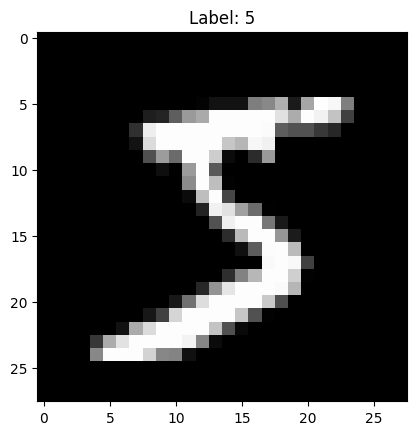

In [17]:
import matplotlib.pyplot as plt
plt.imshow(xtrain[0],cmap="gray")
plt.title(f"Label: {ytrain[0]}")

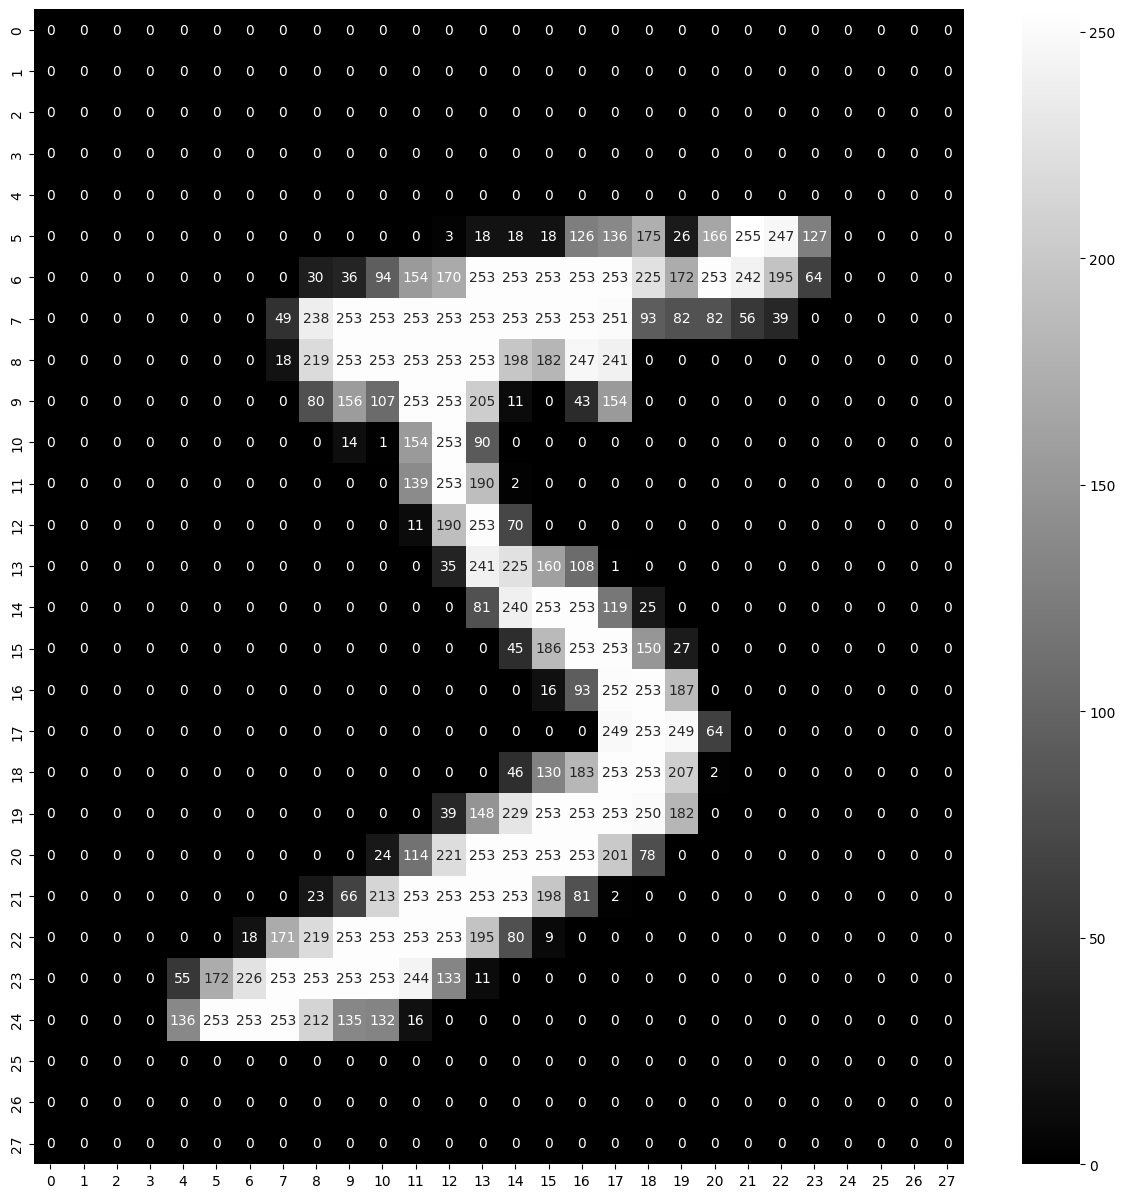

In [18]:
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(xtrain[0],cmap="gray",annot=True,fmt="d")
plt.show()

In [19]:
import numpy as np
def show_random_imgs():
  random_idx = np.random.randint(0,xtrain.shape[1],size = 9)
  plt.figure(figsize=(10,10))
  for idx, value in enumerate(random_idx):
    plt.subplot(3,3,idx+1)
    plt.imshow(xtrain[value],cmap="gray")
    plt.title(f"Label: {ytrain[value]}")
    plt.axis("off")
  plt.show()



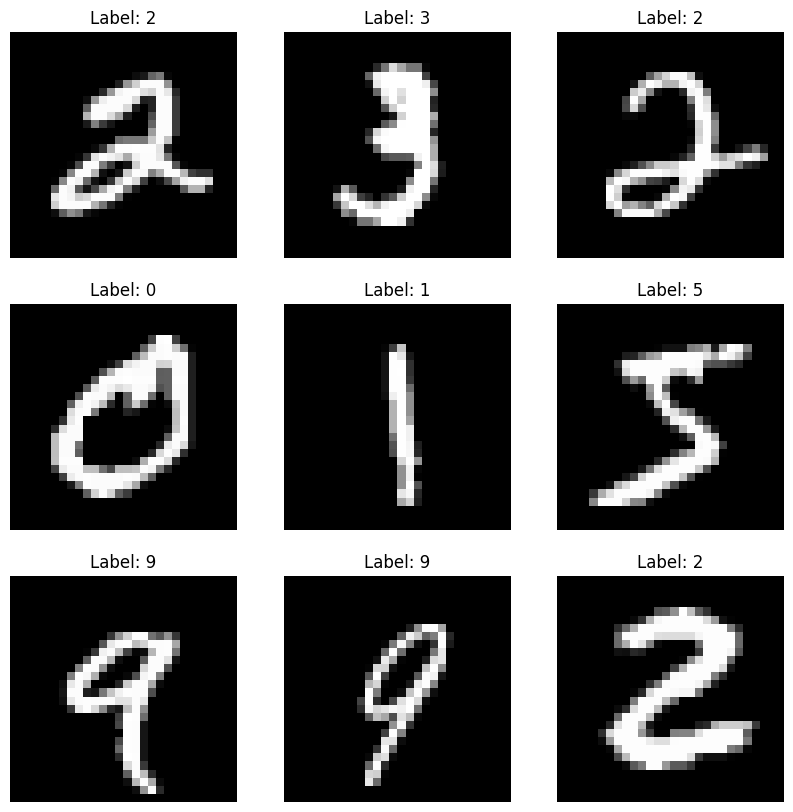

In [20]:
show_random_imgs()

In [21]:
np.unique(ytrain)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

# Preprocess the data
- pixel range is between 0 and 255

In [22]:
xtrain_pre = xtrain.astype("float32") / 255.0
xtest_pre = xtest.astype("float32") / 255.0

In [23]:
xtrain_pre = np.expand_dims(xtrain_pre,axis=-1)
xtest_pre = np.expand_dims(xtest_pre,axis=-1)

In [24]:
xtrain_pre.shape

(60000, 28, 28, 1)

In [25]:
xtest_pre.shape

(10000, 28, 28, 1)

# Preprocess ytrain,ytest with one hot encoding
- for multiclass classification you require one hot encoding

In [26]:
from keras.utils import to_categorical
ytrain_pre = to_categorical(ytrain)
ytrain_pre[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [27]:
ytest_pre = to_categorical(ytest)
ytest_pre[0:5]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

In [28]:
ytest[0:5]

array([7, 2, 1, 0, 4], dtype=uint8)

# Build the convulational neural network

In [29]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Convolution2D,MaxPool2D,Input,Flatten


In [30]:
model = Sequential(
    layers = [
        Input(shape=(28,28,1)),
        Convolution2D(32,kernel_size=(3,3),activation="relu"),
        MaxPool2D(pool_size=(2,2)),
        Convolution2D(64,kernel_size=(3,3),activation="relu"),
        MaxPool2D(pool_size=(2,2)),
        Flatten(),
        Dropout(0.5),
        Dense(ytrain_pre.shape[1],activation="softmax")
    ]
)

In [31]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [33]:
hist = model.fit(xtrain_pre,ytrain_pre,epochs=15,validation_split=0.1,
  batch_size=128)

Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.7594 - loss: 0.7695 - val_accuracy: 0.9782 - val_loss: 0.0788
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9616 - loss: 0.1245 - val_accuracy: 0.9845 - val_loss: 0.0541
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9723 - loss: 0.0885 - val_accuracy: 0.9880 - val_loss: 0.0468
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9777 - loss: 0.0718 - val_accuracy: 0.9900 - val_loss: 0.0375
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9795 - loss: 0.0659 - val_accuracy: 0.9882 - val_loss: 0.0380
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9831 - loss: 0.0554 - val_accuracy: 0.9897 - val_loss: 0.0384
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9855 - loss: 0.0476 - val_accuracy: 0.9890 - val_loss: 0.0402
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9844 - loss: 0.0504 - val_accuracy: 

# Plot the learning curve

In [34]:
model.evaluate(xtrain_pre,ytrain_pre)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9961 - loss: 0.0134


[0.014946544542908669, 0.9959166646003723]

In [35]:
model.evaluate(xtest_pre,ytest_pre)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9887 - loss: 0.0285


[0.023983217775821686, 0.9908999800682068]

Text(0.5, 1.0, 'learning curve')

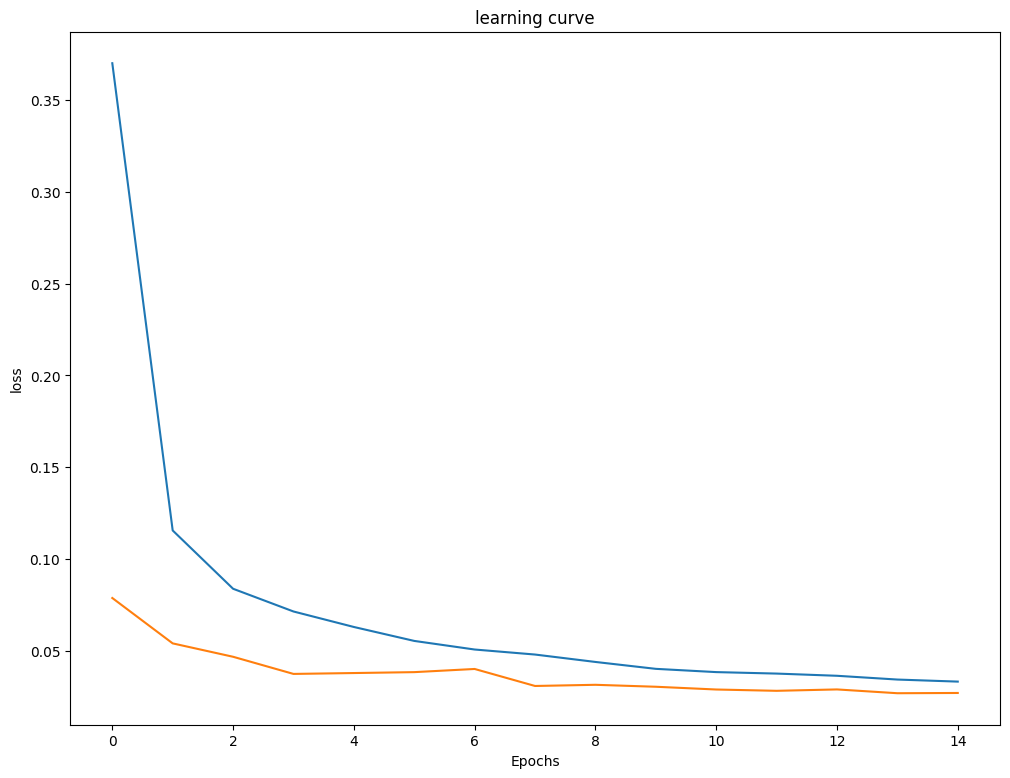

In [36]:
plt.figure(figsize=(12,9))
plt.plot(hist.history["loss"],label="Training Loss")
plt.plot(hist.history["val_loss"],label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.title("learning curve")

# Evaluate model in detail

In [37]:
yprob_train = model.predict(xtrain_pre)
yprob_train[0:5]

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


array([[1.5035338e-11, 1.0102536e-10, 1.1968542e-09, 1.5364375e-03,
        7.3554726e-13, 9.9846220e-01, 9.5798551e-12, 1.9210786e-09,
        4.6407075e-07, 9.7044585e-07],
       [1.0000000e+00, 1.2784982e-14, 5.8486577e-08, 2.8128719e-12,
        1.4405310e-10, 4.4530833e-12, 1.2515302e-08, 1.5669882e-12,
        3.7564205e-09, 3.8518730e-09],
       [3.3721408e-14, 1.9388854e-05, 1.1959437e-08, 1.1652036e-09,
        9.9995208e-01, 3.2215702e-10, 4.7062926e-11, 2.6321857e-05,
        1.4596186e-08, 2.2026097e-06],
       [3.4727428e-08, 9.9994981e-01, 3.9074789e-06, 6.1247536e-09,
        2.6018859e-05, 6.9770452e-09, 1.0515403e-06, 1.4257050e-05,
        4.9280820e-06, 4.0909232e-08],
       [1.5338758e-10, 1.0159061e-08, 4.3585814e-08, 2.4297000e-07,
        8.5595512e-04, 4.1119684e-08, 3.4438524e-12, 9.1237489e-06,
        1.7948897e-04, 9.9895513e-01]], dtype=float32)

In [38]:
yprob_test = model.predict(xtest_pre)
yprob_test[0:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[4.8892407e-10, 2.0728227e-10, 2.9904725e-06, 8.0921527e-06,
        1.9683890e-12, 3.0934963e-10, 1.7302654e-16, 9.9998879e-01,
        2.7078069e-09, 1.3683764e-07],
       [5.7265419e-07, 8.4131343e-06, 9.9996579e-01, 4.8893800e-10,
        1.9950048e-09, 1.0697726e-11, 2.5196030e-05, 2.6083495e-11,
        7.1790588e-08, 5.4405872e-13],
       [2.1939128e-07, 9.9984062e-01, 2.8996974e-06, 1.0608047e-07,
        1.3341717e-04, 1.0058034e-06, 2.7638064e-06, 1.2406288e-05,
        6.3595589e-06, 3.5198292e-07],
       [9.9999666e-01, 1.1779241e-12, 4.6434533e-07, 8.1708251e-10,
        3.0148950e-09, 1.4776367e-08, 2.6630382e-06, 7.8287088e-10,
        6.2225908e-08, 1.5721032e-07],
       [5.7564092e-10, 1.0354670e-09, 1.8401405e-09, 8.1906211e-11,
        9.9997556e-01, 5.8003144e-11, 5.3101101e-09, 6.3900018e-08,
        1.0348653e-08, 2.4350787e-05]], dtype=float32)

In [39]:
ypred_test = np.argmax(yprob_test,axis=1)
ypred_test

array([7, 2, 1, ..., 4, 5, 6])

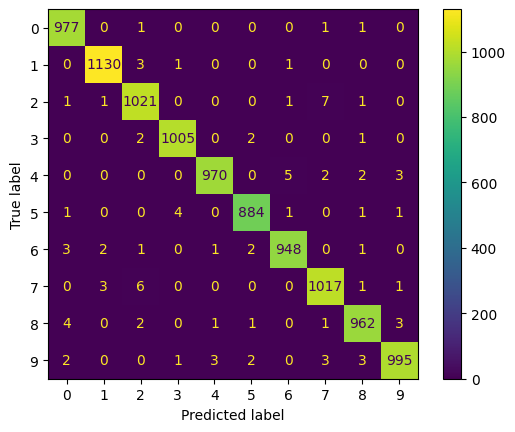

In [40]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(ytest,ypred_test)
plt.show()

In [41]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_test))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



# above model is a good model as it has very less misclassifications and f1_macro > 0.8

# OUT OF SAMPLE PREDICTION

In [42]:
import cv2
img1 = cv2.imread("/content/img_4.jpg",cv2.IMREAD_GRAYSCALE)

In [43]:
img1

array([[  0,   0,   2,   0,   1,   0,   1,   0,   0,   4,   1,   2,   0,
          0,   0,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   4,   0,   3,   1,   0,   0,   4,   0,   0,   2,
          1,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  3,   0,   3,   0,   5,   0,   0,   2,   4,   2,   5,   2,   0,
          0,   1,   5,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  3,   0,   5,   3,   0,   0,  79, 190,  97,   0,   0,   1,   2,
          0,   3,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   1,   0,   2,   0, 227, 250, 246,   8,   0,   3,   0,
          1,   5,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  2,   1,   1,   1,   0,   0, 255, 255, 255,   0,   1,   3,   2,
          2,   0,   3,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  4,   0,   6,   2,   0,   6, 250, 255, 255,   5,   4,   0,   0,
          4,   0,   5,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   3,   0,   0,   5,  70, 255, 255, 254,   1,   0,   8,   0,
          2,   5,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   2,   2,   1,   0, 236, 254, 254, 252,   0,   0,   0,   3,
          0,   3,   0,   1,   0,   3,   0,   4,   3,   0,   1,   0,   0,
          0,   0],
       [  2,   4,   0,   4,   0, 249, 255, 255, 157,   0,   0,   3,   0,
         76, 185,  98,   0,   0,   4,   1,   1,   0,   1,   1,   0,   0,
          0,   0],
       [  2,   3,   0,   3,   0, 255, 255, 255,   0,   1,   0,   0,   4,
        230, 255, 245,   0,   5,   0,   0,   3,   0,   4,   0,   0,   0,
          0,   0],
       [  0,   0,   2,   0,   0, 254, 254, 254,   4,   2,   0,   5,   0,
        255, 255, 253,   3,   0,   1,   7,   1,   3,   0,   4,   0,   0,
          0,   0],
       [  0,   0,   4,   1,   0, 255, 254, 255,   0,   1,   0,   2,   6,
        255, 253, 255,   0,   1,   0,   1,   0,   1,   3,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   2,   0, 255, 255, 255,   1,  99, 224, 249, 251,
        255, 250, 254, 252, 255, 255, 254, 224,  94,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0, 255, 255, 255, 255, 255, 252, 255, 254,
        252, 255, 255, 255, 254, 252, 254, 252, 245,   1,   1,   0,   0,
          0,   0],
       [  0,   0,   4,   0,   2, 247, 255, 255, 254, 248, 254, 255, 255,
        255, 255, 252, 255, 255, 254, 255, 255, 151,   0,   2,   0,   0,
          0,   0],
       [  1,   0,   2,   0,   1, 118, 255, 251, 254, 255, 167,   6,   2,
        255, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   4,   0,   2,   2,   0,   4,   2,   3,   0,   0,   5,  70,
        255, 252, 251,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  3,   0,   1,   0,   0,   1,   0,   0,   0,   0,   1,   1, 230,
        255, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   4,   0,   0,   2,   1,   6,   0,   5,   0,   0, 251,
        255, 248, 148,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   1,   0,   0,   4,   0,   0,   1,   6,   0,   1,   0, 255,
        251, 255,   6,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  2,   1,   0,   2,   0,   1,   9,   0,   0,   5,   1,   0, 255,
        255, 254,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  1,   2,   0,   1,   3,   0,   0,   4,   3,   0,   0,   5, 244,
        251, 255,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   1,   0,   1,   3,   0,   0,   0,   3,   0,   1, 127,
        252, 147,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

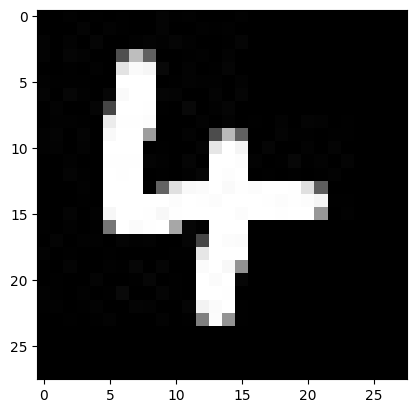

In [44]:
import matplotlib.pyplot as plt

plt.imshow(img1,cmap="gray")

In [47]:
def predict_number(path: str):
  img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
  plt.imshow(img,cmap="gray")
  plt.show()
  img_pre = img.astype("float32") / 255
  img_pre = img_pre.reshape(1,28,28,1)
  yprob = model.predict(img_pre)
  ypred = np.argmax(yprob,axis=1)
  max_prob = np.max(yprob,axis=1)
  print(f"probability: {max_prob}")
  print(f"predicted number: {ypred[0]}")

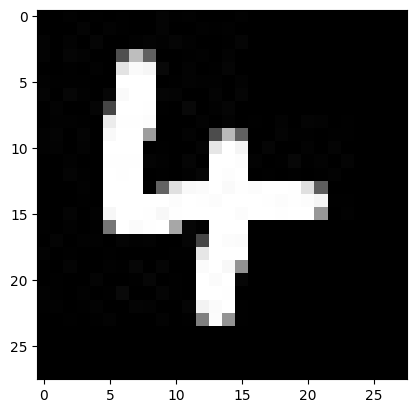

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
probability: [0.99892527]
predicted number: 4


In [48]:
predict_number("/content/img_4.jpg")

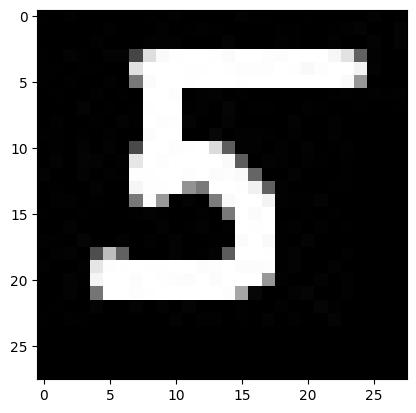

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
probability: [1.]
predicted number: 5


In [49]:
predict_number("/content/img_5.jpg")

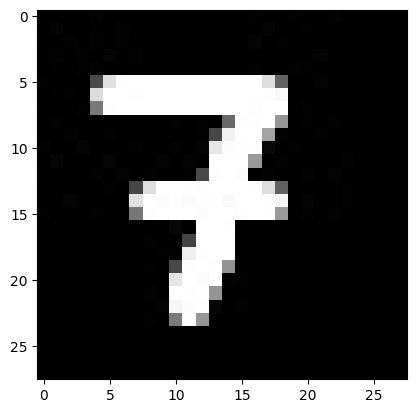

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
probability: [0.9965567]
predicted number: 7


In [50]:
predict_number("/content/img_7.jpg")